# 01 Linear Regression

feature linear data and without curves

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x_data.shape: (100,)


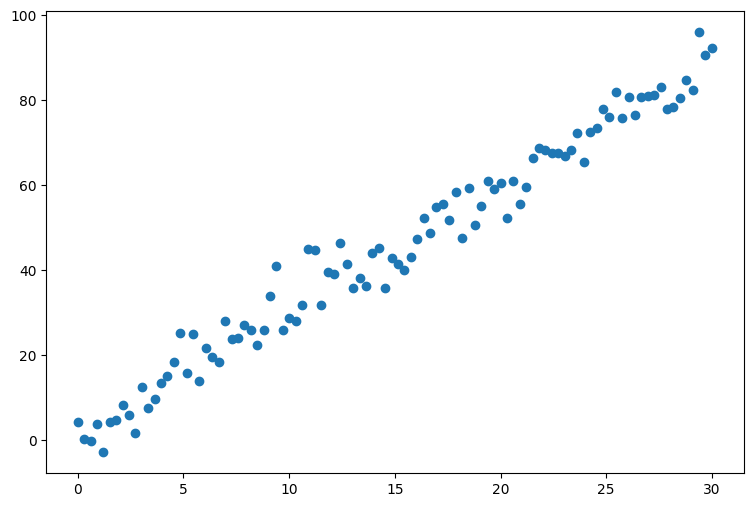

In [96]:
x_data = np.linspace(0, 30, 100) 
print(f"x_data.shape: {x_data.shape}")
y_data = x_data*3 + np.random.normal(0,5,100) 

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x_data, y_data)
plt.show()


## Create a model

In [86]:
class LinearRegression:

  def __init__(self, lr=0.001, n_epochs=1000):
    self.lr = lr
    self.n_epochs = n_epochs
    self.w = np.zeros(1)
    self.b = np.zeros(1)

  def forward(self, X):
    return np.dot(X, self.w) + self.b
  
  def fit(self, X, y):
    print(f'X.shape: {X.shape} y.shape: {y.shape}')
    if X.ndim == 1:
      X = X.reshape(-1, 1)
    if y.ndim == 1:
      y = y.reshape(-1, 1)
    
    n_samples, n_features = X.shape
    _, n_outputs = y.shape
    
    print(f'n_samples: {n_samples} n_features: {n_features}')
    print(f'_: {_} n_outputs: {n_outputs}')

    # standarize the input data
    self.X_mean = np.mean(X, axis=0)
    self.X_std = np.std(X, axis=0)
    X = (X-self.X_mean) / self.X_std

    # standarize the target as well, store to use for prediction 
    self.y_mean = np.mean(y, axis=0)
    self.y_std = np.std(y, axis=0)
    y = (y-self.y_mean) / self.y_std



    
    self.X = X
    self.w = np.zeros((n_features, n_outputs))
    self.b = np.zeros((1,n_outputs))

    print(f"Initial self.w.shape: {self.w.shape} self.b.shape: {self.b.shape}")

    for ep in range(1, self.n_epochs+1):
      y_pred = self.forward(X)

      # calculate loss, MSE
      d = y-y_pred
      loss = np.mean(d**2)

      # calculate grad
      err = y_pred - y
      dw = (2/n_samples) * np.dot(X.T, err)
      db = (2/n_samples) * np.sum(err, axis=0)

      # adjust weights
      self.w -= self.lr * dw
      self.b -= self.lr * db

      if ep%100 == 0:
        print(f"epoch: {ep} loss: {loss} dw:{dw} db:{db}")

    return self

  def predict(self, x):
    if x.ndim == 1:
      x = x.reshape(-1,1)

    # standarize the new input data
    x = (x-self.X_mean) / self.X_std

    # forward pass
    y_pred = self.forward(x)

    # scale pred back to output scale
    return y_pred * self.y_std + self.y_mean
    


In [100]:
model = LinearRegression(lr=0.001, n_epochs=5000)
model.fit(x_data, y_data)

X.shape: (100,) y.shape: (100,)
n_samples: 100 n_features: 1
_: 100 n_outputs: 1
Initial self.w.shape: (1, 1) self.b.shape: (1, 1)
epoch: 100 loss: 0.6817511484026477 dw:[[-1.61767199]] db:[-2.79776202e-16]
epoch: 200 loss: 0.4658937460290826 dw:[[-1.32417259]] db:[-2.70894418e-16]
epoch: 300 loss: 0.3212581452314206 dw:[[-1.08392372]] db:[-2.44249065e-16]
epoch: 400 loss: 0.22434482751300788 dw:[[-0.88726398]] db:[-2.04281037e-16]
epoch: 500 loss: 0.15940790258309934 dw:[[-0.72628484]] db:[-1.9095836e-16]
epoch: 600 loss: 0.1158968112426419 dw:[[-0.59451266]] db:[-1.82076576e-16]
epoch: 700 loss: 0.08674213427447482 dw:[[-0.48664833]] db:[-1.28785871e-16]
epoch: 800 loss: 0.0672069959239494 dw:[[-0.39835417]] db:[-1.59872116e-16]
epoch: 900 loss: 0.054117444947588106 dw:[[-0.3260795]] db:[-8.43769499e-17]
epoch: 1000 loss: 0.045346770192773625 dw:[[-0.26691785]] db:[-9.32587341e-17]
epoch: 1100 loss: 0.03946996541974074 dw:[[-0.21849009]] db:[-7.99360578e-17]
epoch: 1200 loss: 0.03553

In [101]:
y_pred = model.predict(x_data).reshape(100)

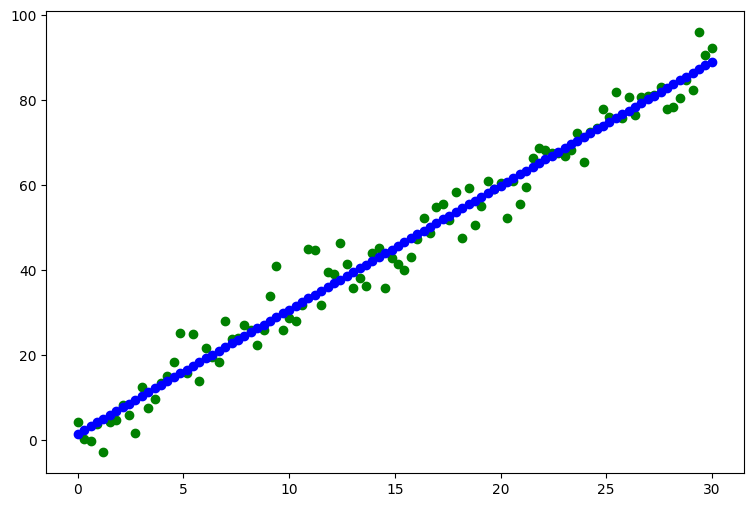

In [102]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x_data, y_data, color='green')
ax.scatter(x_data, y_pred, color='blue')
plt.show()

## Expand more data aparat from on what its already trained

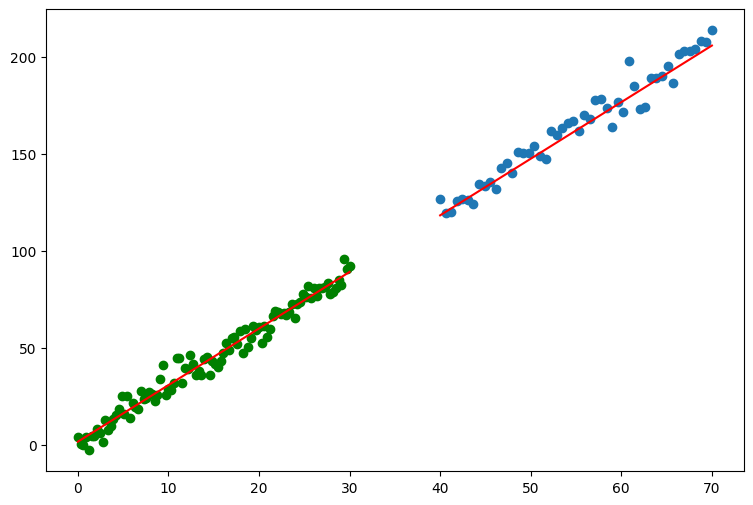

In [109]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x_data, y_data, color='green')
ax.plot(x_data, y_pred, color='red')
x1_data = np.linspace(40, 70, 50) 
y1_data = x1_data*3 + np.random.normal(0,5, x1_data.shape[0]) 
ax.scatter(x1_data, y1_data, marker='o')

y1_pred = model.predict(x1_data).reshape(50)
ax.plot(x1_data, y1_pred, color='red')


plt.show()
